### Mouselinos Spyridon
#### Homework 6
#### February 2020
***

### Exersize 2
***

In [1]:
### Imports and Data Loading

In [2]:
import scipy.io as sio
from scipy.spatial import distance
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.mixture import GaussianMixture 
from scipy.stats import multivariate_normal

Dataset = sio.loadmat('Dataset.mat')
X1 = Dataset['X1']
X2 = Dataset['X2']

## Dataset X1

In [3]:
### Because we have 4-Dimensional Data we could plot them in 3D plot by "leaving one out"

In [4]:
def perform_3d_ploting(dataset):
    colors = ['r','g','b']
    fig = plt.figure(figsize=plt.figaspect(0.33))
    for i in range(1, 4):
        ax = fig.add_subplot(1, 3, i, projection='3d', title="Features {} vs {} vs {}".format(i%3,(i+1)%3,(i+2)%3))
        ax.scatter(dataset[:,i%3],dataset[:,(i+1)%3],dataset[:,(i+2)%3], c=colors[i-1], marker='o', alpha=0.4)
    plt.show()
    return

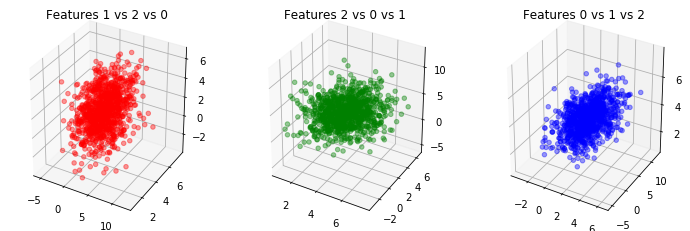

In [5]:
perform_3d_ploting(X1)

In [6]:
### Now Let's Find the 4D Mean point of our total dataset and plot the summary of each point's distance from it.

In [7]:
def find_mean_and_plot_distances(dataset):
    
    def get_cmap(n, name='hsv'):
        return plt.cm.get_cmap(name, n)
    
    mean_point = np.mean(dataset, axis=0)
    distances = [distance.euclidean(f, mean_point) for f in dataset]
    fig, ax = plt.subplots()
    ax.grid()
    ax.set_title('Histogram of L2 distance of dataset points from their mean')
    ax.set_xlabel("Distance Bin")
    ax.set_ylabel("Number of Points in Bin")
    N, bins, patches = ax.hist(distances, bins='auto', edgecolor='white', linewidth=1)
    cmap = get_cmap(n=len(patches))
    for i in range(0,len(patches)):
        patches[i].set_facecolor(cmap(i))
    plt.show()
    print("The mean point is: {}".format(mean_point))
    return 

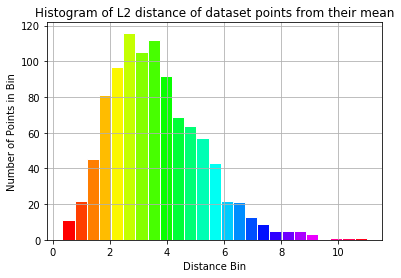

The mean point is: [1.88364427 2.94930523 3.94277602 4.91643708]


In [8]:
find_mean_and_plot_distances(X1)

In [9]:
#### From the single clustered plots in the 3d visualizations we have indications of normality around a center value. Theese assumptions are more confirmed by the above histogram where the concentration of samples around their mean point is relatively high, as pointed out by the small range of distances in the x-axis of the plot. For this reason we opt to approach the above distribution with a parametric ML Estimation under the assumption of a 4 Dimensional Gaussian Distribution.

In [10]:
### For sake of Consistency Let's Calculate the Mean Vector Again
m_x0 = X1[:,0].mean()
m_x1 = X1[:,1].mean()
m_x2 = X1[:,2].mean()
m_x3 = X1[:,3].mean()

In [11]:
### Stack the means into a single vector
m = np.array([[m_x0],[m_x1],[m_x2],[m_x3]])

In [12]:
### Now Let's Compute the Covariance Matrix
cov = np.empty((4,4))
for point in X1:
    z = point.reshape(-1,1)
    d = m - z
    dT = d.T
    temp = np.dot(d,dT)
    cov += temp
cov /= X1.shape[0]

In [13]:
print("The covariance matrix is:\n{}".format(cov))

The covariance matrix is:
[[ 2.51182857  0.11874089  0.98495038  1.08330846]
 [ 0.11874089  5.7401137   0.11198481 -2.28583666]
 [ 0.98495038  0.11198481  1.30976286  1.14052246]
 [ 1.08330846 -2.28583666  1.14052246  6.21080837]]


In [14]:
### Now Let's find the distances.
X1_test = np.array([[2.01,2.99,3.98,5.02],                    [20.78,-15.76,19.38,-25.02],[3.08,3.88,4.15,6.02]])

estimation = multivariate_normal.pdf(X1_test,m.reshape(-1),cov)
print("Estimations:\n{}".format(estimation))

Estimations:
[3.37904075e-003 1.65657893e-208 1.95207559e-003]


In [15]:
#### As we can see,all the pdf values are relatively small, however the pdf value of the 2nd test sample is almost 0, since its distance from the mean of X1 is great.

In [16]:
### Point 2 Distance
distance.euclidean(X1_test[1], m)

42.91396639447862

## Dataset X2

In [17]:
### Let's perform again the same steps for the second dataset.

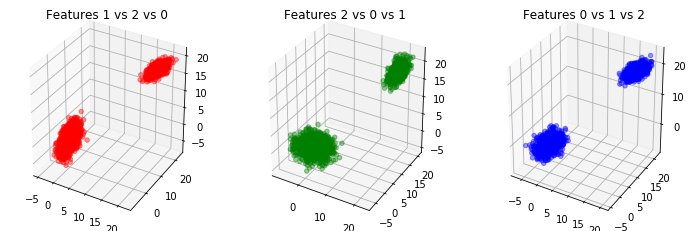

In [18]:
perform_3d_ploting(X2)

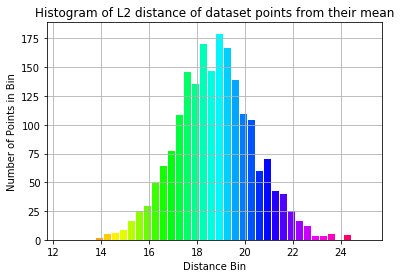

The mean point is: [ 8.49569946  9.01271126  9.43011469 10.03648823]


In [19]:
find_mean_and_plot_distances(X2)

In [20]:
#### In contrast with X1, here the 3d plots give us an intuition about 2 clusters that might generate the data. The clusters seem fairly centroid. Also from the distance histogram we see much greater values in the distance from the center point. That is ok due to the fact that our mean point appears in between the two clusters, thus each point has a great distance from it. For this dataset we will proceed by implementing the Gaussian Mixture Modeling assuming 2 Gaussian Distribution mixture.

In [21]:
modeler = GaussianMixture(n_components=2, covariance_type='full')
_ = modeler.fit(X2)

In [35]:
print("Our Cluster Means Are:\n{}".format(modeler.means_))
print('\n')
print("Our Cluster Covariance Matrices Are:\n{}".format(modeler.covariances_))

Our Cluster Means Are:
[[ 2.80527613e-03  3.24565079e-02 -1.33126366e-01  8.13765609e-02]
 [ 1.69885937e+01  1.79929660e+01  1.89933557e+01  1.99915999e+01]]


Our Cluster Covariance Matrices Are:
[[[ 2.72213566  0.64162882  2.25857803 -0.69748579]
  [ 0.64162882  2.42878413 -1.20733932  0.95572237]
  [ 2.25857803 -1.20733932  6.33695491 -2.49310398]
  [-0.69748579  0.95572237 -2.49310398  4.3452263 ]]

 [[ 1.29209515  0.93452653  0.38234925 -0.27677549]
  [ 0.93452653  1.54785039  0.44085604  0.15801401]
  [ 0.38234925  0.44085604  1.42213399 -0.40128317]
  [-0.27677549  0.15801401 -0.40128317  1.32772529]]]


In [23]:
### Now Let's find the distances.
X2_test = np.array([[0.05, 0.15,-0.12,-0.08],[7.18, 7.98,9.12,9.94], [3.48,4.01,4.55,4.96],[20.78,-15.76,19.38,-25.02]])

estimation = np.exp(modeler.score_samples(X2_test))
print("Estimations:\n{}".format(estimation))

Estimations:
[1.57831095e-003 1.80488930e-024 8.69261803e-009 7.60251661e-105]


In [24]:
#### As we can see, all the pdf values are relatively small, however the pdf values of the 2nd and especially 4th test sample are almost 0.

### Exersize 3
***

In [25]:
### Let's Read and Plot the Image

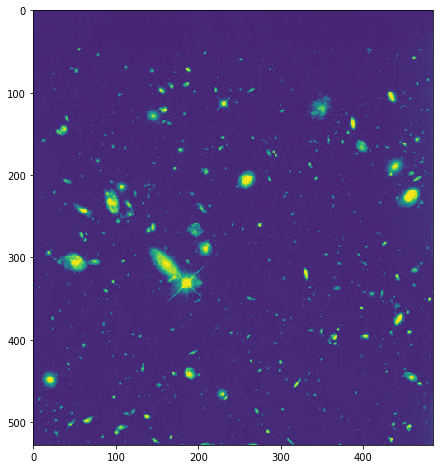

In [26]:
image = mpimg.imread('huble_tel.jpg')
plt.figure(figsize=(8,8))
plt.imshow(image)
plt.show()

In [27]:
print("The image is a {} by {} array".format(image.shape[0],image.shape[1]))

The image is a 528 by 485 array


In [28]:
### Let's produce 15 noisy versions of it.

In [29]:
def noisen_image(image, times=15):
    polluted_images = np.empty((times, image.shape[0], image.shape[1]))
    for i in range(times):
        noise = np.random.normal(0,1,image.shape)
        scale_of_variance = np.sqrt(256)
        total_noise = noise * scale_of_variance
        polluted_image = image + total_noise
        polluted_images[i] = polluted_image
        plt.figure(figsize=(6,6))
        plt.imshow(polluted_image)
        plt.show()
        plt.close()
    return polluted_images

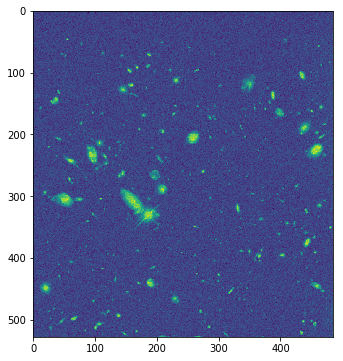

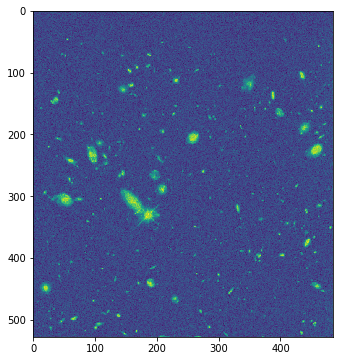

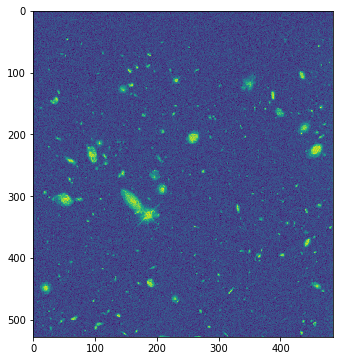

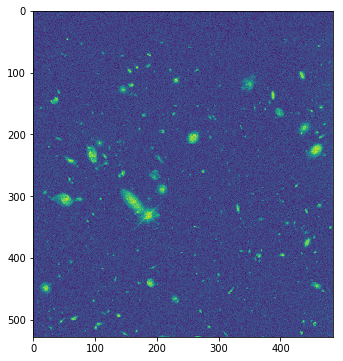

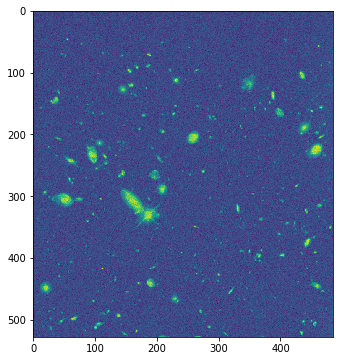

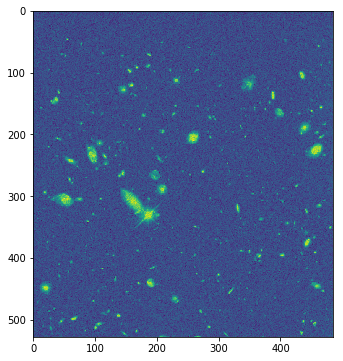

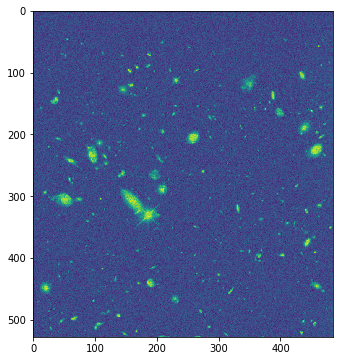

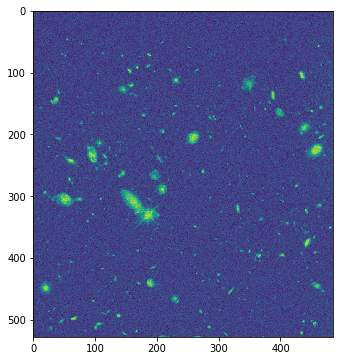

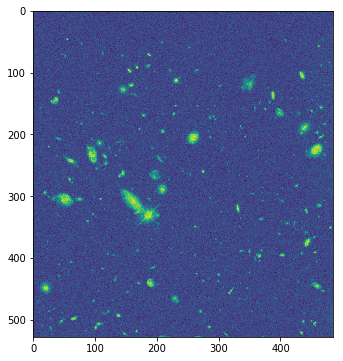

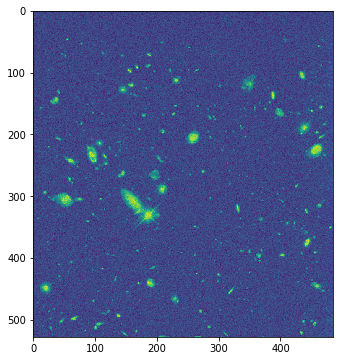

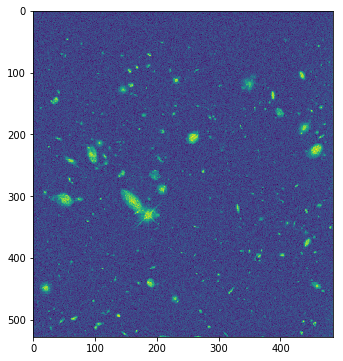

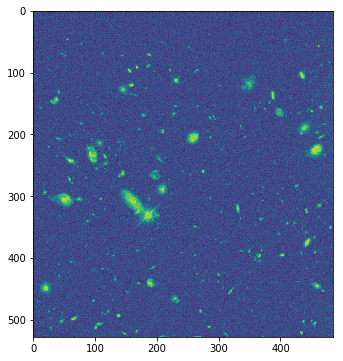

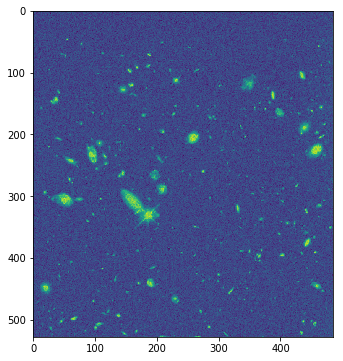

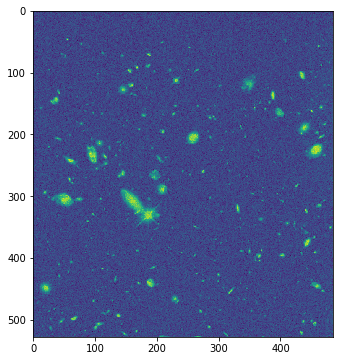

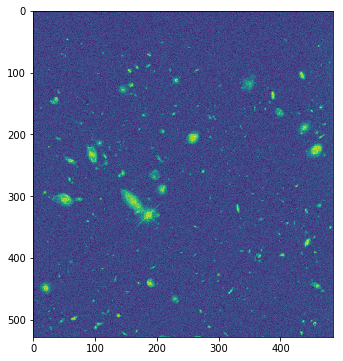

In [30]:
polluted_images = noisen_image(image=image,times=15)

In [31]:
### Let's calculate the average of 15 images

In [32]:
avg = polluted_images.mean(axis=0)

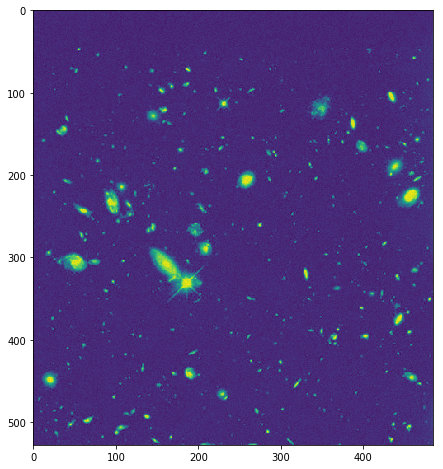

In [33]:
plt.figure(figsize=(8,8))
plt.imshow(avg)
plt.show()
plt.close()

In [34]:
### The averaged image over the 15 noisy versions of the original image is clearly less noisy than the noisy versions. Compared with the original image, noise is still present in the averaged image but has been efficiently suppressed considering from where we started. The above method is in fact the ML method applied for 15 different data sets assuming the data were generated by a normal distribution of unknown mean. Improved noise suppression/removal can be achieved if we increase the number of available noisy images.